# SEP 775 Assignment-1   

Student Name: Rutvik Roy

Student Id: 400490159


1. Building and Analyzing Word Vectors with Word2Vec (20 Points)

    • Task: Create word vectors using the Word2Vec model on a selected corpus.
    
    • Visualization: Utilize PCA or t-SNE for visualizing these vectors in 2D.
    
    • Analysis: Discuss the word relationships and clusters formed.

# Solution:- 1.1 Task: Create word vectors using the Word2Vec model on a selected corpus.


In [4]:
# install necessary libraries

!pip install gensim==4.3.2
!pip install scikit-learn
!pip install matplotlib
!pip install requests
!pip install numpy
!pip install torch
!pip install torchtext

In [1]:
# import necessary libraries
from gensim.models import Word2Vec
import sklearn as sk
import matplotlib.pyplot as plt
import requests

In [32]:
import requests

file_id = '15lkBuo2bhNjUEs9z14Q1crhCgDGwCHih'
url = f'https://drive.google.com/uc?export=download&id={file_id}'

response = requests.get(url)

if response.status_code == 200:
    text_content = response.text
    print(text_content)
else:
    print(f"Error fetching file. Status code: {response.status_code}")

To Chip, Kathy, and Nancy, who graciously shared your father with a nation that loved him; to Walter's friends, colleagues, protégés, and all who considered him a hero; to the men of the Intrepid; to all of you who are gathered here today; I am honored to be here to pay tribute to the life and times of the man who chronicled our time.

I did not know Mr. Cronkite personally.  And my regret is made more acute by the stories that have been shared here today. Nor, for that matter, did I know him any better than the tens of millions who turned to him each night in search of the answer to a simple question:  "What happened today?"  But like them and like all of you, I have benefited as a citizen from his dogged pursuit of the truth, his passionate defense of objective reporting, and his view that journalism is more than just a profession; it is a public good vital to our democracy.

Even in his early career, Walter Cronkite resisted the temptation to get the story first in favor of getting 

In [34]:
# downloading text Data from gutenberg project to train word2vec. it is a perticular text book. 

r = requests.get(r'https://www.gutenberg.org/cache/epub/7128/pg7128.txt')
text = r.text

# preprocessing text data

for char in ["\n", "\r", "\d", "\t"]:
    text = text.replace(char, " ")

# (removing introduction/footnotes)

text = text[12135:]
text=" ".join(text.split())

Source : https://www.gutenberg.org/

In [35]:
corpus=[sentence.split(" ") for sentence in text.split(".")]
print(corpus)

[['The', 'Lion', 'and', 'the', 'Crane', 'The', 'Bodhisatta', 'was', 'at', 'one', 'time', 'born', 'in', 'the', 'region', 'of', 'Himavanta', 'as', 'a', 'white', 'crane;', 'now', 'Brahmadatta', 'was', 'at', 'that', 'time', 'reigning', 'in', 'Benares'], ['', 'Now', 'it', 'chanced', 'that', 'as', 'a', 'lion', 'was', 'eating', 'meat', 'a', 'bone', 'stuck', 'in', 'his', 'throat'], ['', 'The', 'throat', 'became', 'swollen,', 'he', 'could', 'not', 'take', 'food,', 'his', 'suffering', 'was', 'terrible'], ['', 'The', 'crane', 'seeing', 'him,', 'as', 'he', 'was', 'perched', 'on', 'a', 'tree', 'looking', 'for', 'food,', 'asked,', '"What', 'ails', 'thee,', 'friend?"', 'He', 'told', 'him', 'why'], ['', '"I', 'could', 'free', 'thee', 'from', 'that', 'bone,', 'friend,', 'but', 'dare', 'not', 'enter', 'thy', 'mouth', 'for', 'fear', 'thou', 'mightest', 'eat', 'me'], ['"', '"Don\'t', 'be', 'afraid,', 'friend,', "I'll", 'not', 'eat', 'thee;', 'only', 'save', 'my', 'life'], ['"', '"Very', 'well,"', 'says', 

In [5]:
# train word2vec on a this specific corpus (it is text data from a book which is on gutenburg)

word2vec_model = Word2Vec(sentences=corpus, vector_size=15, window=7, min_count=1, workers=4)
word2vec_model.save("myword2vec.model")

In [6]:
# word_vector for different words

words = ["Princesses","sisters", "father", "Lion" ,"king","He","queen","She", "Prince", "kingdom","man","woman","cat","dog"]
for word in words:
    print('Vector for "{word}" is: {vector}'.format(word=f"{word}", vector=word2vec_model.wv[word]))
    print("\n")

KeyError: "Key 'Princesses' not present"

In [11]:
# Top 10 similart vector of a word ["country"]

print("Similar Vectors for {word} is: {vector} ".format(word='["country"]', vector=word2vec_model.wv.most_similar('country', topn=10)))
print("\n")


# similarity between two words

w1="king"
w2="queen"
print(f'Similarity between "{w1}" and "{w2}" is:', word2vec_model.wv.similarity(w1,w2))

Similar Vectors for ["country"] is: [('back', 0.998934268951416), ('father', 0.9986741542816162), ('time', 0.9985768795013428), ('one', 0.9985105395317078), ('used', 0.9984988570213318), ('Raja', 0.9984263181686401), ('made', 0.9984100461006165), ('them,', 0.998380184173584), ('into', 0.9983758926391602), ('before', 0.9983377456665039)] 


Similarity between "king" and "queen" is: 0.945488


# Solution:- 1.2 Visualization: Utilize PCA or t-SNE for visualizing these vectors in 2D.

In [12]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [13]:
#plot 2d graph to visualize the vectors

def plot_word_vectors_using_pca(model,words):
    
    vectors = [model.wv[word] for word in words]

    # Reduce dimensionality with PCA
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(vectors)

    # Plot word vectors
    plt.figure(figsize=(10, 8))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c='blue', edgecolors='k')

    # Annotate words
    for i, word in enumerate(words):
        plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=8)

    plt.title('Word Vectors Visualization')
    plt.show()

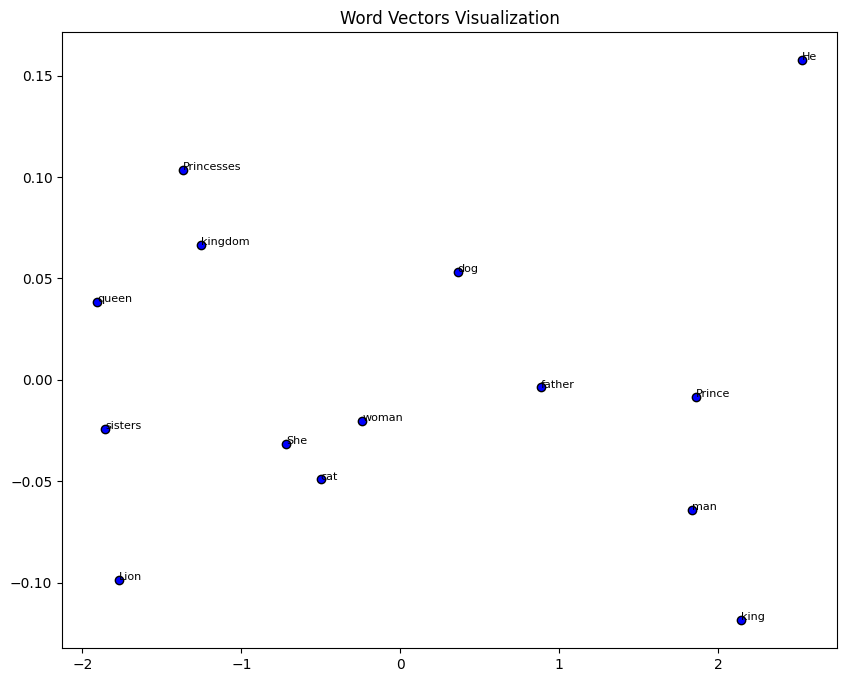

In [14]:
words = ["Princesses","sisters", "father", "Lion" ,"king","He","queen","She", "Prince", "kingdom","man","woman","cat","dog"]
plot_word_vectors_using_pca(word2vec_model,words)

# Solution:- 1.3 Analysis: Discuss the word relationships and clusters formed.

-- Solution is given in seperate pdf file

2. GloVe Vectors Advanced Analysis (20 Points)

• Task: Analyze word relationships using pre-trained GloVe vectors.

• Activity: Conduct an analogy task (e.g., king - man + woman = ?) with examples.

• Explanation: Explain the results of the analogy tasks.

# Solution:- 2.1 Task: Analyze word relationships using pre-trained GloVe vectors.

In [15]:
import torch
import torchtext
import numpy as np

In [16]:
#load glove model ("glove.6B" ~ 800MB) using "torchtext" library

glove_model=torchtext.vocab.GloVe(name="6B",dim=100)

.vector_cache\glove.6B.zip: 862MB [02:41, 5.34MB/s]                               
100%|█████████▉| 399999/400000 [00:15<00:00, 25284.63it/s]


In [17]:
# glove_embedding for different words

words = ["princesses","sisters", "father", "lion" ,"king","he","queen","she", "prince", "kingdom","man","woman","cat","dog"]
for word in words:
    print('Glove_embedding for "{word}" is: {vector}'.format(word=f"{word}", vector=glove_model[word].numpy()))
    print("\n")
    

Glove_embedding for "princesses" is: [ 4.4224e-01 -2.0763e-01  6.9175e-01  3.1222e-01  1.4939e-02  4.2436e-01
 -3.9524e-01  6.0361e-01 -1.1500e-01 -4.2318e-01 -1.6880e-01  5.7197e-01
 -2.6363e-01  4.5622e-01 -6.2014e-02 -5.9457e-01  1.1328e-01  4.6203e-01
 -3.6370e-01  6.9272e-01 -1.2767e-01  1.9988e-02 -1.7736e-02 -4.4645e-02
  5.0687e-01 -1.0682e-02  5.6763e-02 -2.6896e-01 -1.5510e-01 -4.6836e-02
  6.9670e-01 -4.6553e-01  2.3916e-01 -1.0325e+00  3.2549e-01  2.2849e-01
 -9.0007e-02  2.3834e-01 -1.1909e-01 -1.0469e-01  5.8620e-01  5.3991e-01
 -9.4554e-01 -5.4072e-01  4.5457e-01 -9.3228e-02 -6.9243e-01  4.5888e-01
  1.0185e+00  6.1620e-01 -3.9364e-01 -1.6257e-01  2.2795e-01  4.1791e-01
 -2.1237e-01  4.9329e-01 -4.3610e-04  4.8703e-01 -6.9523e-01  3.5965e-01
 -1.7679e-01  6.5599e-01 -9.0408e-02  2.4971e-01 -3.0264e-02  1.0715e-01
 -4.8685e-01  3.1853e-01  4.9958e-02 -5.5362e-01 -7.1927e-02 -8.6432e-01
 -1.0485e-01 -2.8674e-01 -4.9185e-01  2.5265e-01  9.9414e-03 -2.1800e-01
  6.0482e-02 -

In [18]:
# Word relationship or similarity between "king" and "queen"

vector1=glove_model["king"]
vector2=glove_model["queen"]

dot_product = np.dot(vector1, vector2)
magnitude_A = np.linalg.norm(vector1)
magnitude_B = np.linalg.norm(vector2)

cosine_similarity = dot_product / (magnitude_A * magnitude_B)
print(f"Similarity between 'king' and 'queen': {cosine_similarity}")

Similarity between 'king' and 'queen': 0.7507690787315369


In [19]:
# most similar words to word = 'king' (top 5)

w='king'

def similar_words(word,n):
    
    #word vector
    vector=glove_model[w]

    # measure distance from all words
    distances=torch.norm(glove_model.vectors-vector,dim=1)

    #sort the measurd distances
    distances=sorted(enumerate(distances.numpy()),key=lambda x:x[1])
    
    similar_words=[(glove_model.itos[id], diff) for id , diff in distances[1:n+1]]
        
    return similar_words

words=similar_words(w,5)

print(f"Most Similar words and distances are:",)
print("\n")
for word in words:
    print(word[0], word[1])

Most Similar words and distances are:


prince 4.0921655
queen 4.281252
monarch 4.4741716
brother 4.536669
uncle 4.6689677


In [20]:
# most dissimilar words to a word = 'king' (top 5)

w='king'

def dissimilar_words(word,n):
    
    # negative word vector
    vector= - glove_model[w]

    # measure distance from all words
    distances=torch.norm(glove_model.vectors-vector,dim=1)

    #sort the measurd distances
    distances=sorted(enumerate(distances.numpy()),key=lambda x:x[1])
    
    similar_words=[(glove_model.itos[id], diff) for id , diff in distances[1:n+1]]
        
    return similar_words

words=dissimilar_words(w,5)

print(f"Most dissimilar words and distances are:",)
print("\n")
for word in words:
    print(word[0], word[1])

Most dissimilar words and distances are:


asie 4.9987803
nizhal 4.999963
in-process 5.012104
biohazards 5.0298405
s.s.d. 5.0688396


In [21]:
#best words that complete the sentence (top 5)

#for e.g. setence=   he likes to watch  _______

vector=glove_model['he']+glove_model['likes']+glove_model['to']+glove_model['watch']

average_vector=vector/4

#measure distance from all words
distances=torch.norm(glove_model.vectors-average_vector,dim=1)

#sort the measurd distances
distances=sorted(enumerate(distances.numpy()),key=lambda x:x[1])

print(f"Best words that complete the sentence : he likes to watch  _______")
print("\n")
for id , diff in distances[1:6]:
    print(glove_model.itos[id])

Best words that complete the sentence : he likes to watch  _______


even
did
wanted
come
turn


# Solution:- 2.2 Activity: Conduct an analogy task (e.g., king - man + woman = ?) with examples.

In [22]:
 def Analogy(word_list) : 
    
    vector= glove_model[word_list[0]] - glove_model[word_list[1]] + glove_model[word_list[2]]

    # measure distance from all words
    distances=torch.norm(glove_model.vectors-vector,dim=1)

    #sort the measurd distances
    distances=sorted(enumerate(distances.numpy()),key=lambda x:x[1])

    for id , distance in distances[1:2]:
        result_word, distance = glove_model.itos[id], distance
   
    return result_word , distance, vector

In [23]:
# Analogy example 1:- king - man + woman

word_list=["king","man","woman"]
result_word , distance,vector = Analogy(word_list)
print(" Analogy Result :", result_word)

 Analogy Result : queen


In [24]:
# Analogy example 2:- madam - woman + man

word_list=["madam","woman","man"]
result_word , distance,vector = Analogy(word_list)
print(" Analogy Result :", result_word)

 Analogy Result : godfather


In [25]:
# Analogy example 3:- uncle - man + woman

word_list=["uncle","man","woman"]
result_word , distance,vector = Analogy(word_list)
print(" Analogy Result :", result_word)

 Analogy Result : grandmother


In [26]:
# Analogy example 4:- france - paris + germany

word_list=["france","paris","germany"]
result_word , distance,vector = Analogy(word_list)
print(" Analogy Result :", result_word)

 Analogy Result : poland


In [27]:
# Analogy example 5:- visiting - visit + sit

word_list=["visiting","visit","sit"]
result_word , distance,vector = Analogy(word_list)
print(" Analogy Result :", result_word)

 Analogy Result : sitting


# Solution:- 2.3 Explanation: Explain the results of the analogy tasks.

-- solution given in seperate pdf file

3. Semantic and Syntactic Word Relationships (10 Points)

• Comparison: Evaluate Word2Vec and GloVe for capturing semantic and syntactic
relationships.

• Illustration: Use specific word pairs or groups to demonstrate differences in representation
by each model.

In [28]:
# Import libraries
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from transformers import pipeline

word2vec_model=word2vec_model
glove_model = glove_model

C:\Users\rutvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\rutvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\rutvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torc

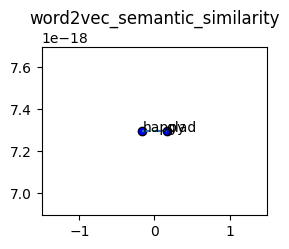

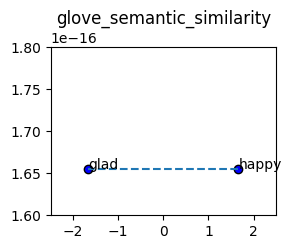

Semantic Similarity of word pair ('happy', 'glad') - Word2Vec: 0.9484672546386719
Semantic Similarity of word pair ('happy', 'glad') - GloVe: 0.7833360433578491


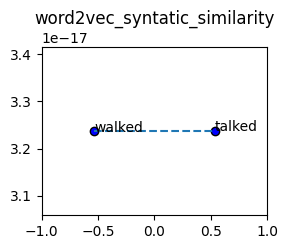

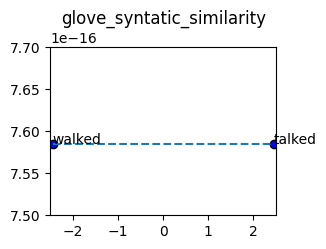

Syntatic Similarity of word pair ('walked', 'talked') - Word2Vec: 0.7081150412559509
Syntatic Similarity of word pair ('walked', 'talked') - GloVe: 0.5647754669189453




In [29]:
###### Semantic & syntactic relationships ##### 

#example: similarity between word pairs

#semantic similarity
def semantic_similarity(semantic_word_pair):
    
    word2vec_semantic_similarity = word2vec_model.wv.similarity(*semantic_word_pair)
    glove_semantic_similarity = torch.cosine_similarity(glove_model[semantic_word_pair[0]].unsqueeze(0),glove_model[semantic_word_pair[1]].unsqueeze(0))[0]
    
    #plot word2vec_semantic_similarity
    vectors = [word2vec_model.wv[word] for word in semantic_word_pair]
    
    #reduce dimention using PCA
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(vectors)
    
    plt.subplot(2,2,1)
    plt.xlim(-1.5,1.5)
    #plt.ylim(2.5e-17,2.7e-17)
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c='blue', edgecolors='k')
    plt.plot(vectors_2d[:, 0], vectors_2d[:, 1], linestyle='dashed')
    for i, word in enumerate(semantic_word_pair):
        plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=10)
    plt.title('word2vec_semantic_similarity')
    plt.show()
    
    
    #plot glove_semantic_similarity
    vectors = [glove_model[word].numpy() for word in semantic_word_pair]
    
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(vectors)
    
    plt.subplot(2,2,2)
    plt.xlim(-2.5,2.5)
    plt.ylim(1.6e-16,1.8e-16)
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c='blue', edgecolors='k')
    plt.plot(vectors_2d[:, 0], vectors_2d[:, 1], linestyle='dashed')
    for i, word in enumerate(semantic_word_pair):
        plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=10)
    plt.title('glove_semantic_similarity')
    plt.show()
    
    print(f"Semantic Similarity of word pair {semantic_word_pair} - Word2Vec: {word2vec_semantic_similarity}")
    print(f"Semantic Similarity of word pair {semantic_word_pair} - GloVe: {glove_semantic_similarity}")
    
    return

semantic_smilarity_word_pair = ('happy', 'glad')
semantic_similarity(semantic_smilarity_word_pair)
  

# syntatic similarity
def syntatic_similarity(syntactic_word_pair):
    
    word2vec_syntatic_similarity = word2vec_model.wv.similarity(*syntactic_word_pair)
    glove_syntatic_similarity = torch.cosine_similarity(glove_model[syntactic_word_pair[0]].unsqueeze(0),glove_model[syntactic_word_pair[1]].unsqueeze(0))[0]
    
    #plot word2vec_syntatic_similarity
    vectors = [word2vec_model.wv[word] for word in syntactic_word_pair]
    
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(vectors)
    
    plt.subplot(2,2,1)
    plt.xlim(-1,1)
    #plt.ylim(1.3e-16,1.5e-16)
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c='blue', edgecolors='k')
    plt.plot(vectors_2d[:, 0], vectors_2d[:, 1], linestyle='dashed')
    
    for i, word in enumerate(syntactic_word_pair):
        plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=10)
    plt.title('word2vec_syntatic_similarity')
    plt.show()
    
    
    #plot glove_syntatic_similarity
    vectors = [glove_model[word].numpy() for word in syntactic_word_pair]
    
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(vectors)
    
    plt.subplot(2,2,2)
    plt.xlim(-2.5,2.5)
    plt.ylim(7.5e-16,7.7e-16)
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c='blue', edgecolors='k')
    plt.plot(vectors_2d[:, 0], vectors_2d[:, 1], linestyle='dashed')

    for i, word in enumerate(syntactic_word_pair):
        plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=10)
    plt.title('glove_syntatic_similarity')
    plt.show()
    
    print(f"Syntatic Similarity of word pair {syntactic_word_pair} - Word2Vec: {word2vec_syntatic_similarity}")
    print(f"Syntatic Similarity of word pair {syntactic_word_pair} - GloVe: {glove_syntatic_similarity}")
    print("\n")
    
    return

syntatic_similarity_word_pair = ("walked", "talked")
syntatic_similarity(syntatic_similarity_word_pair)

In [33]:
#example: Analogy task


def semantic_analogy(word_list):
    
    word2vec_semantic_analogy = word2vec_model.wv.most_similar(positive=[word_list[0], word_list[2]], negative=[word_list[1]], topn=1)
    result_word , distance ,vector = Analogy(word_list)
    
    print(f"Semantic Analogy {word_list} -- Word2Vec - Result: {word2vec_semantic_analogy[0][0]}")
    print(f"Semantic Analogy {word_list} -- GloVe - Result: {result_word}")

word_list=["king","man","woman"]
semantic_analogy(word_list)

def syntatic_analogy(word_list):
    word2vec_syntatic_analogy = word2vec_model.wv.most_similar(positive=[word_list[0], word_list[2]], negative=[word_list[1]], topn=1)
    result_word , distance ,vector = Analogy(word_list)
    print(f"Syntatic Analogy {word_list} -- Word2Vec - Result: {word2vec_syntatic_analogy[0][0]}")
    print(f"Syntatic Analogy {word_list} -- GloVe - Result: {result_word}")

word_list=["run","running","eat"]
syntatic_analogy(word_list)

Semantic Analogy ['king', 'man', 'woman'] -- Word2Vec - Result: way
Semantic Analogy ['king', 'man', 'woman'] -- GloVe - Result: queen
Syntatic Analogy ['run', 'running', 'eat'] -- Word2Vec - Result: animal,
Syntatic Analogy ['run', 'running', 'eat'] -- GloVe - Result: eaten
